# Python Plotting Best Practices

**Advanced Astroinformatics Student Project**

*N. Hernitschek, 2022*



---
## Contents
* [Recap, Questions](#first-bullet)
* [Plotting Best Practice](#second-bullet)
* [Summary](#seventh-bullet)


## 1. Recap, Questions <a class="anchor" id="first-bullet"></a>

Time for questions!

Your **tasks until this week** were:

Use a multiclass supervised machine learning algorithm on the three TESS feature data sets, including making diagnostic plots and the classification scores. Keep in mind this is an **imbalanced data set**, so you should modify your code accordingly for the 10-fold verification.

Try to interpret your results.



## 2. Plotting Best Practices <a class="anchor" id="second-bullet"></a>



An effective plot is one which:

* Conveys the right and necessary information without distorting facts.
* Simple and straightforward in design.
* Any aesthetics support the information rather than overshadow it.
* Not crowded with information.


Considerations when visualizing data:

*    What are you visualizing?
*    Who is your audience?
*    In what format will you be presenting the visualization?



`Matplotlib` is Python's oldest plotting library (created 2003), and it is still the most popular. A typical plot found in an astronomical paper (and many other scientific publications) is made with `matplotlib`.
This package allows for precise control over your plots. In the following we will see how we can utilize this to follow plotting best practices and create publication-ready plots.


### 2.1 Save Plots as pdf

When saving plots, save them as `.pdf`. This format gives you vectorized plots that also, in most cases, save on disk space.

`plt.savefig('lightcurve_plot.pdf')`

Make sure to always call `savefig()` before you call `show()`. This is important as after the execution of `show()`, a new figure is created and thus `savefig()` would save a blank image.

Rule of thumb: outside of a Jupyter notebook, just use `savefig()` and than open that file.


### 2.2 Readability

To meet the goals we defined above, first of all a plot must be well readable. We will see here a few ways to customize a plot in order to improve readability.



#### 2.2.1 Changing Colors

In a scatter and line plot (we will see other types of plots later on), the most obvious changes are those to control the line colors and styles as well as symbols representing individual data points.

For this, the `plt.plot()` function takes additional arguments (key word arguments, `kwargs`). The color can be specified in a variety of ways:

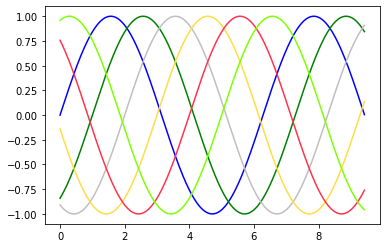

In [3]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0,3*np.pi,0.01)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44') #add comment which color     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported



If no color is specified, `Matplotlib` will automatically cycle through a set of default colors.

Similarly, the line style can be adjusted using the `linestyle` keyword:

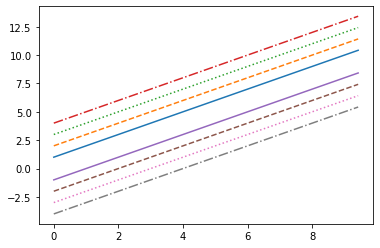

In [10]:

plt.plot(x, x + 1, linestyle='solid')
plt.plot(x, x + 2, linestyle='dashed')
plt.plot(x, x + 3, linestyle='dotted')
plt.plot(x, x + 4, linestyle='dashdot');

# For short, you can use the following codes:
plt.plot(x, x - 1, linestyle='-')  # solid
plt.plot(x, x - 2, linestyle='--') # dashed
plt.plot(x, x - 3, linestyle=':') # dotted
plt.plot(x, x - 4, linestyle='-.');  # dashdot




These linestyle and color codes can be combined into a single non-keyword argument to the `plt.plot()` function:




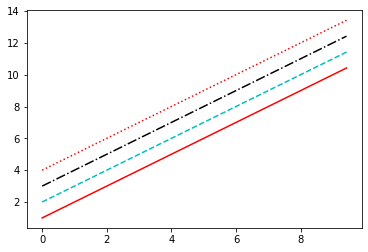

In [11]:
plt.plot(x, x + 1, '-r')  # solid red
plt.plot(x, x + 2, '--c') # dashed cyan
plt.plot(x, x + 3, '-.k') # dashdot black
plt.plot(x, x + 4, ':r');  # dotted red



#### 2.2.2 Formatting Axes and Labels


The readability of plots can be increased significantly by taking care of the formatting of axes and labels.
We start with a simple histogram plot and gradually improve it.



(array([  6.,  30.,  67., 137., 230., 245., 153.,  96.,  29.,   7.]),
 array([-3.08070464, -2.47191052, -1.86311641, -1.25432229, -0.64552817,
        -0.03673405,  0.57206006,  1.18085418,  1.7896483 ,  2.39844242,
         3.00723654]),
 <BarContainer object of 10 artists>)

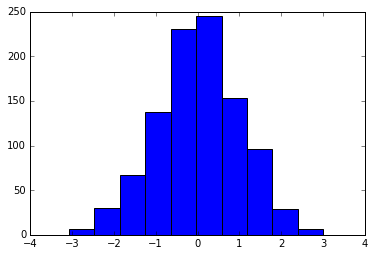

In [15]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

x = np.random.randn(1000)
plt.hist(x)



We can adjust this by hand to make it a much more visually pleasing plot:


(array([  6.,  30.,  67., 137., 230., 245., 153.,  96.,  29.,   7.]),
 array([-3.08070464, -2.47191052, -1.86311641, -1.25432229, -0.64552817,
        -0.03673405,  0.57206006,  1.18085418,  1.7896483 ,  2.39844242,
         3.00723654]),
 <BarContainer object of 10 artists>)

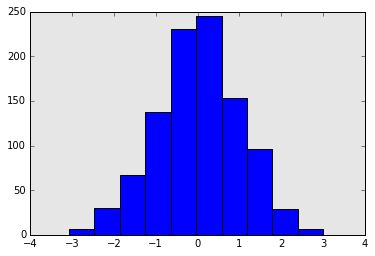

In [16]:


# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
plt.hist(x)

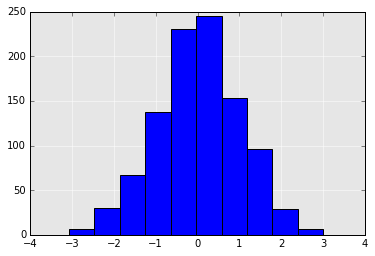

In [17]:

# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
plt.hist(x)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')


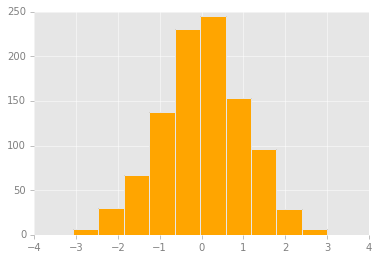

In [18]:

# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
plt.hist(x)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')


# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='orange');

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

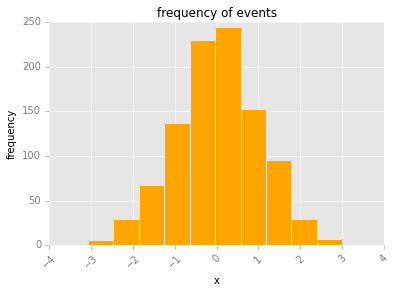

In [19]:

# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)
plt.hist(x)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')


# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='orange');


# add a title and axis labels

plt.xlabel("x")
plt.ylabel("frequency")
plt.title("frequency of events")

# rotate axis ticks to make large numbers better readable
plt.xticks(rotation = 45)


Matplotlib does a decent job of choosing default **axes limits** for plots, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the `plt.xlim()` and `plt.ylim() methods:


(-1.5, 1.5)

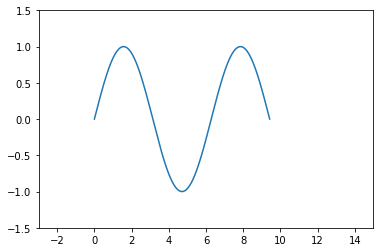

In [5]:
x = np.arange(0,3*np.pi,0.001)

plt.plot(x, np.sin(x))

plt.xlim(-3, 15)
plt.ylim(-1.5, 1.5)

However it's not recommended as it negatively influences the plotting style:

The `plt.axis()` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:


(0.0, 9.424, -0.9999999243471311, 0.9999999998313446)

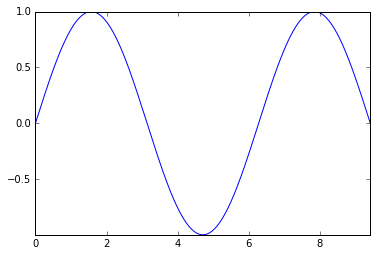

In [42]:

plt.plot(x, np.sin(x))
plt.axis('tight')

One can, however, use this to get the margins of the plot and then, based on this, increase them.

We can also change the **tick frequency**.

A common problem with the default settins is that smaller plots (like in suplots) can end up with crowded labels. We can see this in the plot grid shown here:


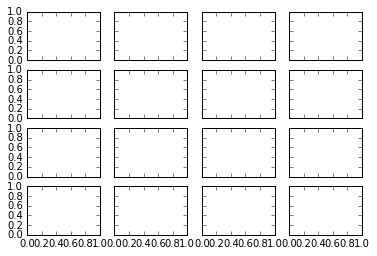

In [45]:

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)


Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher. We can fix this by using the `plt.MaxNLocator()`, which allows us to specify the maximum number of ticks that will be displayed. Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

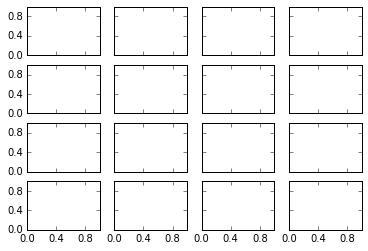

In [46]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

# show altered figure
fig

#### 2.2.3 Error Bars

For any scientific measurement (or calculation), accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the result itself. In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

`Matplotlib` has many ways to show error bars.



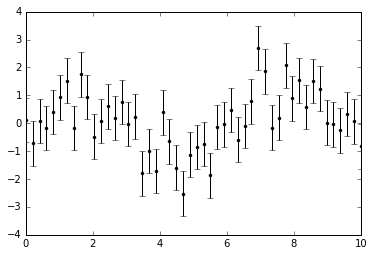

In [47]:

# Basic Error Bars

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');



Here the keyword argument `fmt` is a **format code** controlling the appearance of lines and points.

In addition to these basic options, the errorbar function has many options to fine-tune the outputs. Using these additional options you can easily customize the aesthetics of a plot with error bars. Especially in crowded plots, the readability is improved a lot when making the error bars lighter than the data points themselves:




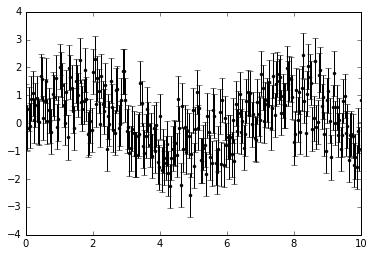

In [51]:
# a bad plot

x = np.linspace(0, 10, 250)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(250)

plt.errorbar(x, y, yerr=dy, fmt='.k');


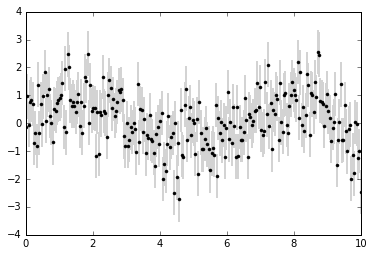

In [59]:
# a much better readable plot 

x = np.linspace(0, 10, 250)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(250)

plt.errorbar(x, y, yerr=dy, fmt='.', color='black',
             ecolor='lightgray', elinewidth=2, capsize=0);



In addition to these options, you can also specify horizontal errorbars (`xerr`), one-sided errorbars, and many other variants. For more information on the options available, refer to the documentation for `plt.errorbar`.



In some situations it is desirable to show errorbars on **continuous quantities**. This is especially the case for fits or simulations. `Matplotlib`does not come with a built-in routine for this, but we can construct one on our own.

Here we'll perform a simple Gaussian process regression, using the Scikit-Learn API (see Introducing Scikit-Learn for details). This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.

The details of a Gaussian process regression are not important here, but we will show how to visualize such continuous error estimates.



In [70]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8, 18])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 20, 1000)
yfit, dyfit_ori = gp.predict(xfit[:, np.newaxis],return_std=True)
dyfit = 2 * dyfit_ori  # 2*sigma ~ 95% confidence region

We now have `xfit`, `yfit`, and `dyfit`, which sample the continuous fit to our data. We could pass these to the plt.errorbar function as above, but we don't really want to plot 1,000 points with 1,000 errorbars. Instead, we can use the `plt.fill_between` function with a light color to visualize this continuous error:

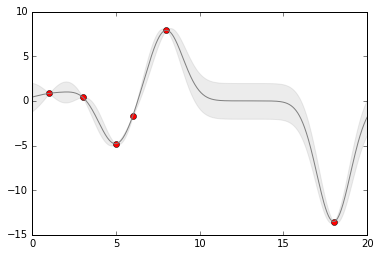

In [77]:
# Visualize the result
plt.plot(xdata, ydata, 'or') # red o
plt.plot(xfit, yfit, '-', color='grey')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.15)
plt.xlim(0, 20);

For making this plot, we pass an x value, then the lower y-bound, then the upper y-bound to the `plt.fill_between` function, and the result is that the area between these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors. In regions far from a measured data point, the model is not strongly constrained, and the model errors are allowed to increase.

For more information on the options available in `plt.fill_between()` (and the closely related `plt.fill()` function), see the `Matplotlib` documentation.

### 2.4 Customizing Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements. In general, each
plot with more than one data source (which leads to a plot element such as a plotted line, plotted distribution...) should have a legend.

The simplest legend can be created with the `plt.legend()` command, which automatically creates a legend for any labeled plot elements:


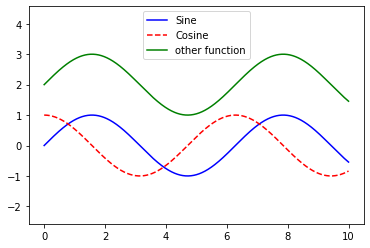

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.plot(x, 2+np.sin(x), '-g', label='other function')
ax.axis('equal')
leg = ax.legend()



We can specify the location of the legend and turn off the legend frame:



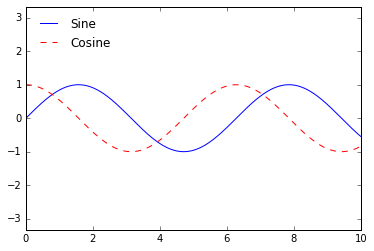

In [81]:
ax.legend(loc='upper left', frameon=False)

fig # to replot figure



We can use the `ncol` command to specify the number of columns in the legend:


    



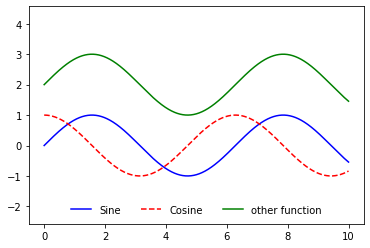

In [10]:
ax.legend(frameon=False, loc='lower center', ncol=3)

fig

As we have already seen, the legend includes all labeled elements by default. 
We can, however, specifiy which labels should be included in the legend.
The `plt.plot()` command is able to create multiple lines at once, and returns a list of created line instances. Passing any of these to `plt.legend()` will tell it which to identify, along with the labels we'd like to specify:




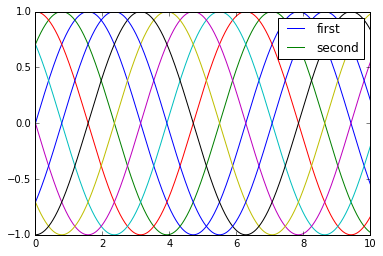

In [87]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.25))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);


### 2.3 Including LaTeX for Symbols

In many cases, plots contain symbols or equations that show up also in the text. To ensure a consistant look of these symbols and equations, LaTeX code can be included into plots to render them.



Text(0.5, 1.0, 'The dependence of the period $p$ on phase shift $\\phi$')

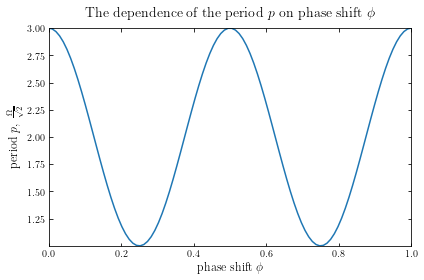

In [12]:
import numpy as np
import matplotlib.pyplot as plt


#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=True)

t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

#ax.set_xlabel(r'\textbf{time (s)}')
#ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
#ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

ax.set_xlabel(r"phase shift $\phi$", fontsize=12)
ax.set_ylabel(r"period $p$, $\frac{\Omega}{\sqrt{2}}$",  fontsize=12)

ax.set_title(r"The dependence of the period $p$ on phase shift $\phi$", fontsize=14,pad=12)



### 2.4 Annotating Plots

Annotations are of great help in marking different positions of a plot. Along with the text, an (optional) arrow can be added.


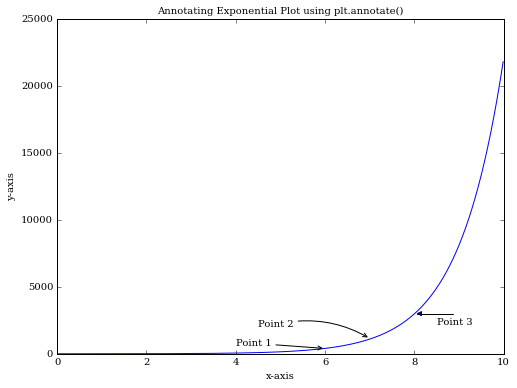

In [100]:
fig=plt.figure(figsize=(8,6))

x=np.arange(0,10,0.01)
plt.plot(x,np.exp(x))
plt.title('Annotating Exponential Plot using plt.annotate()')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.annotate('Point 1',xy=(6,400),arrowprops=dict(arrowstyle='->'),xytext=(4,600))

plt.annotate('Point 2',xy=(7,1150),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-.2'),xytext=(4.5,2000))

plt.annotate('Point 3',xy=(8,3000),arrowprops=dict(arrowstyle='-|>',connectionstyle='angle,angleA=90,angleB=0'),xytext=(8.5,2200))

plt.show()

### 2.5 Managing Subplots

Python's `matplotlib` comes with many ways on how to organize subplots.


The simplest way is to use `subplot`. It associates each cell of a grid with a so-called `axes` which is a single subplot.


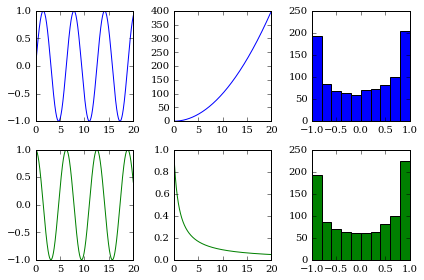

In [105]:
# Synthetic Data
time = np.linspace(0, 20, 1000)
height = np.sin(time)
weight = np.cos(time)# Plotting all the subplots

fig, axes = plt.subplots(2, 3)
axes[0, 0].plot(time, height, color='blue')
axes[0, 1].plot(time, time**2, color='blue')
axes[0, 2].hist(height, color='blue')
axes[1, 0].plot(time, weight, color='green')
axes[1, 1].plot(time, 1/(time+1), color='green')
axes[1, 2].hist(weight, color='green')
plt.tight_layout()


`matplotlib.gridspec` offers more flexibility:

Instead of automatically associating an axes to each cell of the grid as done with `subplots`, with `matplotlib.gridspec` the user can select how many cells each individual plotting area will occupy. So if we wanted a plot to occupy twice the area of another plot, we could associate it to twice the number of cells in the grid.

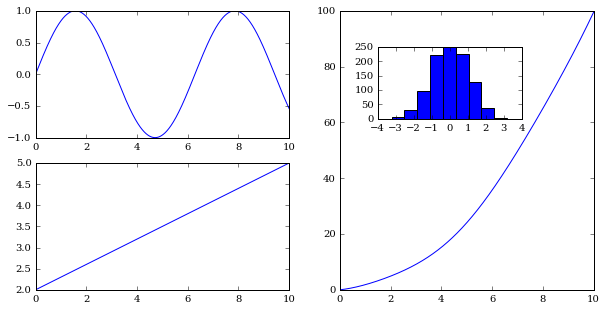

In [107]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)
ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)
ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(time, score)
ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2])
ax3.hist(distribution)
plt.show()



This type of flexible grid alignment has a wide range of uses. A common use is that of creating **2D histogram plots**:

    


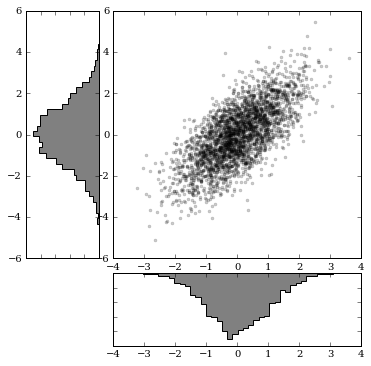

In [110]:

# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()




### 2.6 Color Schemes 


How to chose color schemes for plots?
Keep in mind that:
* Plots, especially in papers, might be printed or might be read on a eBook reader only capable of showing monochrome (black and white, greyscale) images.
* Almost 10% of all people cannot distinguish certain colors well that most people see as diffrent.

We should thus use **colorblindness (color vision deficiency)-friendly** color schemes.

Colorblindness-friendly color schemes are more than just avoiding the combination of red and green

Color combinations to avoid for people with color vision deficiency include:

 *   red & green
 *   green & brown
 *   green & blue
 *   blue & gray
 *   blue & purple
 *   green & gray
 *   green & black.

A **general rule**: Whenever possible, don't use color alone as indicator. Color should only be a secondary feature to encode something.

* Use a different color together with a different symbol or line style.
* Add numbers to heat plots.
* For bar or pie charts, apply different fill textures.
* If color alone must be used (check: is this really the case?): leverage light vs. dark, e.g. a very light green and a very bright/ dark red (that appears as a darker color when printed monochrome, or to people with a color vision deficiency).

    
You can always check your plots here:
http://www.color-blindness.com/coblis-color-blindness-simulator/

### 2.7 Visualizing Densities \& 3D Functions

Scatter plots are useful for relatively small data sets. For large however, they can get overly crowded. In this case, it is better to use plot styles that can show the **density** instead of individual data points.

### 2.7.1 Two-Dimensional Histograms

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. We'll take a brief look at several ways to do this here. We'll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution:





In [117]:
mean = [0, 4]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

A simple scatter plot would look like this:

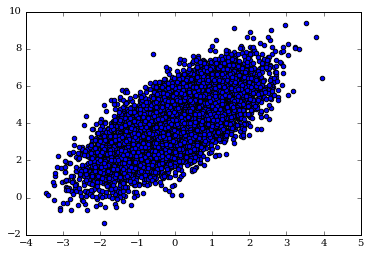

In [118]:
plt.scatter(x,y)

This plot, showing all data points, doesn't give a good representation of the distribution.

One straightforward way to plot a **two-dimensional histogram** is to use Matplotlib's `plt.hist2d function`:


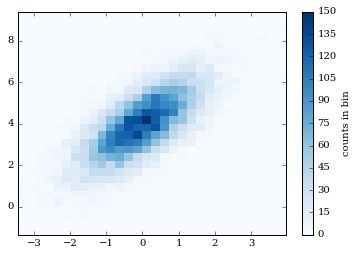

In [119]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with `plt.hist`, `plt.hist2d` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the documentation.

The shown two-dimensional histogram creates a **tesselation** of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, `Matplotlib` provides the `plt.hexbin` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:



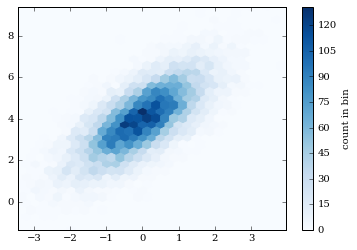

In [121]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### 2.7.2 Kernel density estimation

Another common method of evaluating densities in multiple dimensions is kernel density estimation (KDE). KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.  Here an example on how to apply KDE to the same data set:


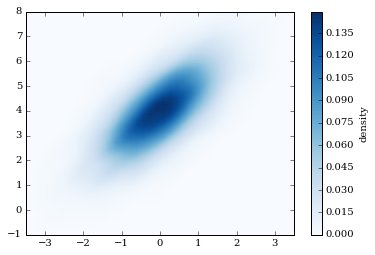

In [128]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-1, 8, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -1, 8],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

## Summary <a class="anchor" id="fifth-bullet"></a>

At this point, all of you should have seen ways on how to make nice, readable plots ready for thesis papers and publications.

If you'd like to experiment further with plotting options, I can recommend taking a look at the `matplotlib` library. Also the `seaborn` library, which builds on `matplotlib`, might be of interest:

https://seaborn.pydata.org/
https://opensource.com/article/20/4/plot-data-python
